# Double Pendulum Small Vibrations CUED IB Mechanics

The following code is mostly completed for you: press 'shift-enter' in each cell to run the code starting at the top. You will get some errors part of the way through and this is where you need to fill in the gaps.



Import standard set of modules for scientific computing and plotting [ALREADY COMPLETE]:

In [58]:
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18,'font.family':'serif'})

This cell loads the experimental data on the examples sheet for experiments 1, 2 and 3.
The final format for each experiment is an array of four items, ["name of experiment", timepoints, alphas, betas],
where timepoints is a list of the time points, and alphas/betas are lists of the alpha/beta angles (in degrees) at each time point.
[ALREADY COMPLETE]:

In [59]:
# This cell loads the experimental data for experiments 1, 2 and 3 on the examples sheet.


time_exp_1 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_1 =  np.array([2.84239,3.20602,3.61468,3.93772,4.23296,4.55116,4.77848,5.01914,5.21669,5.38611,5.47613,5.55316,5.59925,5.58964,5.5774,5.51673,5.44202,5.33507,5.17329,4.96554,4.7289,4.52102,4.2367,3.95266,3.63683,3.25607,2.92872,2.51185,2.17757,1.72483,1.30879,0.903022,0.418937,0.0190558,-0.469041,-0.887936,-1.34795,-1.78742,-2.17515,-2.64991,-3.00614,-3.45486,-3.79017,-4.17119,-4.50009,-4.8255,-5.1193,-5.35238,-5.60052,-5.84922,-5.99368,-6.09941,-6.23897,-6.31944,-6.36028,-6.37474,-6.36095,-6.29013,-6.19568,-6.08017,-5.96155,-5.79863,-5.53698,-5.2934,-5.08623,-4.75185,-4.43148,-4.11817,-3.73339,-3.39774,-2.9505,-2.58494,-2.13993,-1.7189,-1.29396,-0.838676,-0.406699,0.0733716,0.498881,0.920274,1.35798,1.75499,2.1982,2.52536,2.93412,3.24909,3.6123,3.89975,4.12914,4.40215,4.63579,4.77098,4.92141,5.06997,5.16144,5.20755,5.21228,5.20407,5.1371,5.03411,4.90306,4.74294,4.60559,4.38324,4.1144,3.89503,3.62031,3.26651,2.97031,2.58502,2.26556,1.83656,1.486,1.04225,0.68145,0.215392,-0.174785,-0.598854,-0.999069,-1.39385,-1.85583,-2.20035,-2.62307,-2.95018,-3.34975,-3.65321,-3.99374,-4.31319,-4.57234,-4.81017,-5.08385,-5.23241,-5.39426,-5.55721,-5.68343,-5.78259,-5.83884,-5.86254,-5.86184,-5.83359,-5.73744,-5.63368,-5.50642,-5.32865,-5.20364,-5.00047,-4.75792,-4.5055,-4.2835,-3.97203,-3.65095,-3.35863,-2.97339,-2.67224,-2.27369,-1.93716,-1.49673,-1.16482,-0.735409,-0.386124,0.058546,0.410685,0.846199,1.16542,1.56912,1.88315,2.28274,2.55289,2.89498,3.16803,3.40521,3.69508,3.90969,4.07831,4.26653,4.41356,4.52357,4.61911,4.65683,4.66638,4.65569,4.6199,4.53414,4.42026,4.28925,4.09924,3.94248,3.74361,3.47761,3.23418,2.97129,2.64086,2.36464,2.01504,1.65886,1.31187,0.933384,0.556543,0.174485,-0.214163,-0.58916,-0.988536,-1.35008,-1.75087,-2.10545,-2.47018,-2.82823,-3.14927,-3.48274,-3.75337,-4.04398,-4.30922,-4.51367,-4.71651,-4.91365,-5.08945,-5.19725,-5.26153,-5.3268,-5.37068,-5.3953,-5.35273,-5.30623,-5.24955,-5.17876,-5.10034,-4.90993,-4.73419,-4.53763,-4.34638,-4.10688,-3.82424,-3.57967,-3.29829,-2.94849,-2.69233,-2.32424,-2.02051,-1.64174,-1.32084,-0.947102,-0.591966,-0.243442,0.12893,0.453452,0.831021,1.11327,1.4742,1.76006,2.08725,2.37038,2.59433,2.8839,3.12303,3.27668,3.4724,3.6685,3.79511,3.91257,3.97372,4.03551,4.0496,4.04885,4.03368,3.99673,3.95109,3.85142,3.73291,3.59108,3.38595,3.22116,3.04204,2.78115,2.51633,2.29843,2.00114,1.68993,1.42125,1.06171,0.771002,0.396645,0.0928874,-0.274732,-0.598356,-0.913678,-1.30874,-1.59947,-1.97265,-2.25409,-2.59443,-2.85848,-3.13752,-3.4394,-3.65654,-3.8887,-4.13534,-4.30941,-4.46257,-4.59191,-4.69537,-4.80522,-4.89515,-4.91408,-4.95005,-4.93329,-4.90446,-4.8147,-4.71925,-4.59634,-4.47411,-4.33659,-4.17483,-3.94906,-3.73707,-3.51087,-3.25478,-2.97366,-2.74573,-2.40569,-2.10858,-1.82417,-1.47351,-1.18703,-0.83636,-0.532499,-0.193802,0.141162,0.442233,0.791399,1.03184,1.3731,1.64727,1.88113,2.18279,2.40829,2.58388,2.81918,3.0029,3.1647,3.25671,3.35625,3.46641,3.57268,3.59347,3.62667,3.62382,3.59066,3.50686,3.4179,3.31232,3.21516,3.10431,2.94896,2.74159,2.52893,2.36431,2.14089,1.8696,1.63323,1.36895,1.05844,0.82204,0.515805,0.203403,-0.0606755,-0.396341,-0.65411,-0.980095,-1.29366,-1.5513,-1.87307,-2.1059,-2.3997,-2.67945,-2.8757,-3.10703,-3.3588,-3.54207,-3.6865,-3.85524,-4.00836,-4.13966,-4.23903,-4.30907,-4.36064,-4.40758,-4.39791,-4.39374,-4.34712,-4.28822,-4.22308,-4.12518,-4.0023,-3.83675,-3.68881,-3.53648,-3.36319,-3.13988,-2.91079,-2.6977,-2.44558,-2.15369,-1.94521,-1.64015,-1.36304,-1.10659,-0.797134,-0.542362,-0.227834,0.0775441,0.315059,0.61582,0.904095,1.13237,1.42084,1.64647,1.82768,2.08166,2.29198,2.44239,2.59309,2.73412,2.88553,2.98994,3.06012,3.14049,3.15418,3.17027,3.17285,3.13521,3.08694,3.012,2.92395,2.79594,2.65798,2.49246,2.38658,2.20468,1.98061,1.76109,1.58308,1.34764,1.06638,0.865457,0.613884,0.312549,0.0933587,-0.173047,-0.48746,-0.714045,-0.996153])
beta_exp_1 =  np.array([7.20638,7.95872,8.72563,9.42912,10.091,10.8186,11.3356,11.7379,12.1457,12.5507,12.8012,13.156,13.3043,13.3723,13.3976,13.2419,12.9953,12.8281,12.526,12.1039,11.8284,11.0664,10.4626,9.87808,9.17968,8.31489,7.32768,6.49064,5.42393,4.60249,3.51602,2.4444,1.43114,0.335599,-0.614528,-1.71709,-2.71697,-3.79976,-4.82543,-5.66728,-6.63666,-7.42972,-8.38465,-9.19895,-9.91828,-10.4428,-10.9802,-11.6568,-11.9819,-12.3874,-12.63,-13.0573,-13.1335,-13.2204,-13.1969,-13.123,-12.9585,-12.6654,-12.3652,-12.0777,-11.4829,-10.9361,-10.4651,-9.90404,-8.96229,-8.17447,-7.60489,-6.73127,-6.09398,-5.04859,-4.29711,-3.27743,-2.32793,-1.3842,-0.466986,0.46897,1.37239,2.1273,3.09431,3.95305,4.78135,5.5673,6.27652,7.09361,7.60477,8.40134,8.98804,9.39027,10.0713,10.4231,10.72,11.0446,11.4282,11.4987,11.4733,11.5419,11.6113,11.4788,11.4745,11.4861,11.1464,10.7229,10.4991,9.91703,9.71771,8.85425,8.33994,7.91464,7.0682,6.406,5.64118,4.9149,3.97427,3.31854,2.21426,1.48387,0.504255,-0.379787,-1.35224,-2.29174,-3.04136,-4.07664,-4.75553,-5.74372,-6.39765,-7.18224,-7.93622,-8.70518,-9.22024,-9.84381,-10.2257,-10.7881,-11.2189,-11.5881,-11.7636,-12.0129,-12.0411,-12.0877,-12.0783,-11.9616,-11.8524,-11.5978,-11.357,-11.0048,-10.4048,-9.94822,-9.42098,-8.63924,-7.8639,-7.3513,-6.63631,-5.63505,-4.8614,-3.84577,-3.11963,-2.06787,-1.28132,-0.238703,0.571306,1.60166,2.28399,3.29142,3.92719,4.91684,5.54204,6.38912,6.95654,7.81515,8.25032,8.72054,9.379,9.52008,10.1209,10.2458,10.4881,10.7555,10.8987,10.8198,10.7674,10.769,10.6559,10.5427,10.3229,9.90542,9.63398,9.39693,8.71161,8.25404,7.77582,7.15055,6.61223,5.89915,5.17277,4.49506,3.75359,2.97984,2.292,1.51029,0.764474,-0.0427806,-0.884014,-1.70928,-2.4896,-3.14588,-3.90635,-4.58444,-5.26449,-6.02603,-6.57813,-7.15152,-7.7202,-8.15996,-8.67194,-9.17485,-9.44619,-9.74748,-10.0845,-10.407,-10.5015,-10.5545,-10.5792,-10.7212,-10.642,-10.515,-10.3391,-9.8372,-9.64796,-9.3525,-8.69561,-8.37299,-7.71641,-7.22849,-6.65051,-5.84168,-5.23767,-4.47601,-3.81791,-2.97461,-2.18759,-1.28705,-0.504786,0.273405,1.07208,1.8544,2.70718,3.30913,4.33239,4.98247,5.60652,6.18553,6.83516,7.56909,7.90974,8.45049,8.90742,9.36878,9.39234,9.71583,9.99097,10.1894,10.2251,10.2443,10.2652,10.194,10.0049,9.62275,9.20641,8.99235,8.5375,8.0952,7.63647,7.03191,6.58868,6.012,5.17796,4.61648,3.90931,3.12274,2.46685,1.60419,0.985272,0.177968,-0.475298,-1.26621,-2.08604,-2.68047,-3.40718,-3.96118,-4.71013,-5.33957,-5.87194,-6.42703,-7.04425,-7.28942,-7.93261,-8.03042,-8.54375,-8.72528,-8.969,-9.27251,-9.39885,-9.37025,-9.38663,-9.3254,-9.32955,-9.20704,-9.11922,-8.81158,-8.54071,-8.30021,-7.80325,-7.47437,-7.05995,-6.56417,-6.04513,-5.52849,-4.87223,-4.162,-3.66256,-3.00074,-2.26711,-1.7158,-0.926747,-0.298318,0.445724,1.08849,1.69009,2.33357,2.99767,3.7697,4.28695,4.85034,5.5166,5.872,6.43851,6.95866,7.3012,7.5683,7.93462,8.33315,8.52229,8.80526,8.76196,8.96714,8.989,8.96615,8.74511,8.79453,8.53864,8.28344,8.12936,7.67241,7.2449,6.92525,6.5058,5.89601,5.31541,4.82131,4.19056,3.55559,2.97686,2.24634,1.62431,0.87455,0.185546,-0.432805,-1.13697,-1.86735,-2.4325,-3.13924,-3.68048,-4.38888,-4.80225,-5.36499,-5.89841,-6.37246,-6.76964,-7.157,-7.63418,-7.95523,-7.99745,-8.281,-8.45192,-8.59868,-8.68579,-8.57636,-8.63089,-8.56175,-8.38581,-8.22273,-7.80018,-7.6489,-7.44508,-7.03765,-6.63938,-6.07659,-5.59545,-5.1301,-4.68069,-4.04719,-3.51819,-2.97859,-2.24614,-1.68896,-1.04373,-0.36009,0.126551,0.865804,1.39825,1.86075,2.58443,3.12349,3.60909,4.22736,4.50124,5.02094,5.55718,5.76397,6.15179,6.56369,6.7149,7.10912,7.17107,7.31822,7.42998,7.50522,7.59842,7.58187,7.46908,7.39678,7.23458,7.09439,6.99967,6.78603,6.43439,6.20588,5.68837,5.3306,4.969,4.60705,3.97648,3.55149,3.0837,2.40196,1.76013,1.38948,0.723341,0.143688,-0.286782,-1.02467,-1.54703])

Experiment_1=["Experiment 1",time_exp_1,alpha_exp_1,beta_exp_1]


time_exp_2 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_2 = np.array([-3.03251,-3.63996,-4.15419,-4.57815,-5.00439,-5.29847,-5.51457,-5.68077,-5.78073,-5.78002,-5.65449,-5.47171,-5.26857,-4.96039,-4.55254,-4.14663,-3.63597,-3.06574,-2.46072,-1.85441,-1.24249,-0.572076,0.103683,0.707422,1.27681,1.80938,2.32801,2.75442,3.15495,3.39695,3.66131,3.82952,3.91987,3.9317,3.87269,3.71963,3.4893,3.2354,2.89547,2.48568,2.04221,1.54546,1.00051,0.417168,-0.126322,-0.705982,-1.31707,-1.88583,-2.37196,-2.873,-3.3068,-3.68758,-3.98986,-4.2526,-4.47037,-4.53077,-4.55726,-4.53733,-4.47647,-4.32604,-4.08336,-3.77523,-3.45092,-3.01977,-2.57471,-2.07573,-1.53986,-0.979133,-0.445546,0.163172,0.741868,1.24636,1.75329,2.25935,2.64363,3.04789,3.32095,3.58086,3.75074,3.85687,3.85738,3.81474,3.6942,3.47882,3.23587,2.94371,2.55047,2.15425,1.67113,1.12492,0.586784,0.0357868,-0.583534,-1.18358,-1.72818,-2.28686,-2.8405,-3.32325,-3.74894,-4.17214,-4.49925,-4.72749,-4.9595,-5.09484,-5.16548,-5.14761,-5.05028,-4.87278,-4.62854,-4.41662,-4.01353,-3.64571,-3.15514,-2.7195,-2.15029,-1.61115,-1.03721,-0.50048,0.119938,0.666162,1.15565,1.68211,2.14634,2.50862,2.86409,3.16059,3.34372,3.50488,3.61215,3.63529,3.57512,3.4334,3.25555,3.06377,2.75517,2.44172,2.03626,1.615,1.09774,0.664894,0.155586,-0.39649,-0.868522,-1.36568,-1.84034,-2.24253,-2.66681,-2.99443,-3.29222,-3.57959,-3.72992,-3.85216,-3.9017,-3.9058,-3.85576,-3.7307,-3.59131,-3.36509,-3.07446,-2.78747,-2.41768,-2.03639,-1.58515,-1.19123,-0.67277,-0.225252,0.192591,0.667895,1.01771,1.42641,1.73908,2.0417,2.30952,2.46683,2.57861,2.63916,2.64731,2.62247,2.52192,2.40491,2.20069,1.91408,1.63847,1.28705,0.91114,0.498694,0.0738983,-0.418631,-0.851436,-1.31609,-1.7404,-2.16489,-2.57761,-2.93188,-3.24884,-3.53722,-3.74765,-3.90954,-4.01599,-4.08584,-4.08182,-4.01283,-3.87978,-3.71622,-3.52694,-3.22387,-2.90221,-2.547,-2.13072,-1.71989,-1.30297,-0.800553,-0.359306,0.144344,0.595415,0.991811,1.43573,1.77957,2.15686,2.44608,2.64346,2.87304,3.01628,3.08843,3.11796,3.08243,2.97921,2.81478,2.60225,2.39204,2.10222,1.72656,1.40404,0.981713,0.598766,0.159591,-0.294592,-0.69525,-1.17799,-1.54376,-1.95891,-2.26642,-2.62067,-2.89304,-3.10631,-3.32463,-3.47525,-3.54557,-3.58465,-3.57103,-3.50465,-3.37356,-3.20396,-2.99361,-2.77657,-2.45901,-2.15219,-1.82905,-1.44226,-1.10898,-0.714349,-0.386096,0.0222952,0.323467,0.685907,0.95366,1.21283,1.45073,1.65715,1.73895,1.83088,1.87794,1.87162,1.83389,1.74216,1.63422,1.46307,1.24327,0.968564,0.731529,0.388752,0.124911,-0.217665,-0.571492,-0.900423,-1.2609,-1.52641,-1.85039,-2.1085,-2.35057,-2.55409,-2.74228,-2.85761,-2.91558,-2.95941,-2.95043,-2.90737,-2.82735,-2.70978,-2.52058,-2.29242,-2.08001,-1.79337,-1.48941,-1.21159,-0.836914,-0.51758,-0.138569,0.190906,0.543964,0.860696,1.11363,1.41056,1.66852,1.83043,2.01166,2.15186,2.22181,2.24831,2.24384,2.18566,2.07266,1.91129,1.73267,1.52672,1.29185,0.980449,0.717664,0.353682,0.0565091,-0.314747,-0.633142,-0.980272,-1.33654,-1.65155,-1.973,-2.22314,-2.46876,-2.70299,-2.8749,-2.97779,-3.06888,-3.12972,-3.13581,-3.10864,-3.0362,-2.91226,-2.79895,-2.60763,-2.37761,-2.14926,-1.90956,-1.61871,-1.3268,-1.02822,-0.687923,-0.44113,-0.101193,0.162352,0.415655,0.679447,0.890834,1.03759,1.19139,1.34075,1.43799,1.47598,1.47281,1.45742,1.39408,1.28803,1.12204,0.961981,0.834542,0.624124,0.347862,0.157543,-0.0717009,-0.355455,-0.58869,-0.809002,-1.05866,-1.29628,-1.44656,-1.64326,-1.7866,-1.94799,-2.03204,-2.0817,-2.09254,-2.09205,-2.07668,-2.02708,-1.93904,-1.78591,-1.63973,-1.45559,-1.29275,-1.09585,-0.84964,-0.624068,-0.44626,-0.190692,0.0559671,0.219869,0.438355,0.662573,0.842144,0.947717,1.03091,1.13492,1.1869,1.19462,1.19501,1.153,1.06804,0.987344,0.900737,0.751804,0.57315,0.346129,0.17094,-0.0236167,-0.287178,-0.547146,-0.749193,-0.988991,-1.25684,-1.42781,-1.66877,-1.86305,-2.03256,-2.15251,-2.25599,-2.35011,-2.43328,-2.45425,-2.45139,-2.41913,-2.35037,-2.2754,-2.16027,-2.04666,-1.90576,-1.68521,-1.48865,-1.31687,-1.08327,-0.836901,-0.610029,-0.420853])
beta_exp_2 = np.array([13.1562,16.1476,18.802,20.9992,22.9611,24.2633,25.3636,26.0713,26.2941,26.1151,25.3829,24.3165,23.2066,21.2783,19.1168,16.8291,13.8813,10.7039,7.38719,3.88815,0.33288,-3.34474,-6.92265,-10.3398,-13.5466,-16.534,-19.1489,-21.2905,-23.396,-24.7554,-25.9248,-26.6634,-26.9633,-26.8556,-26.2651,-25.3589,-23.8569,-22.2959,-20.0662,-17.7045,-15.0076,-11.9393,-8.69829,-5.1042,-1.66379,1.95064,5.58972,9.02178,12.0476,15.114,17.6477,19.9982,22.0543,23.4689,24.8236,25.5479,25.7901,25.793,25.5463,24.8655,23.6094,22.0216,20.2302,18.0191,15.3967,12.42,9.4899,6.23512,2.96009,-0.471339,-3.91845,-7.147,-10.2627,-13.191,-15.7048,-18.0838,-20.0748,-21.5739,-22.913,-23.7921,-24.1635,-24.2526,-23.934,-23.1569,-22.2757,-20.9708,-19.0714,-17.1361,-14.6654,-12.0209,-9.2268,-6.25992,-3.0092,0.176332,3.22981,6.22853,9.16206,11.6659,14.2918,16.406,18.2123,19.5607,20.7957,21.4849,21.9342,21.9552,21.5855,20.9271,19.8054,18.5686,16.7853,14.7801,12.5845,10.0474,7.31375,4.41634,1.46627,-1.46016,-4.6273,-7.41394,-9.97467,-12.6227,-14.9824,-16.7996,-18.602,-19.9829,-20.7369,-21.3359,-21.6265,-21.6412,-21.2464,-20.4894,-19.2924,-17.9943,-16.17,-14.2781,-11.789,-9.31932,-6.49656,-3.8171,-0.869769,2.19265,5.00809,7.85243,10.4726,12.7517,15.1929,16.8308,18.5535,19.8914,20.7455,21.3813,21.6491,21.4921,21.0571,20.2564,19.3096,17.8367,16.2005,14.1529,12.0042,9.55501,6.89495,4.23429,1.19295,-1.61261,-4.41727,-7.19259,-9.48519,-12.0098,-14.3124,-16.0794,-17.8165,-18.9549,-20.0146,-20.5964,-20.8446,-20.7699,-20.5175,-19.9056,-19.0014,-17.5755,-16.0953,-14.1586,-12.2115,-9.80618,-7.28824,-4.74314,-2.10234,0.57043,3.18872,5.70668,8.02948,10.3645,12.4102,14.0093,15.649,16.7446,17.6189,18.2666,18.5176,18.4821,18.1123,17.5227,16.5949,15.229,13.9795,12.1753,10.2196,8.01849,5.89236,3.34542,1.02335,-1.44831,-3.92901,-6.05456,-8.27773,-10.2967,-12.0511,-13.6324,-14.8317,-15.8737,-16.7503,-17.1286,-17.2833,-17.1525,-16.6855,-15.8248,-14.7844,-13.5981,-11.9635,-10.341,-8.43425,-6.3322,-4.12939,-1.87877,0.473816,2.7639,5.04108,7.10059,9.13725,10.8324,12.5464,14.0408,14.8497,15.7909,16.5015,16.7205,16.741,16.4435,15.8517,15.1551,13.9624,12.5783,11.1643,9.30649,7.33563,5.37317,3.04638,0.989065,-1.31837,-3.5006,-5.78605,-7.70267,-9.87401,-11.3356,-13.0559,-14.2327,-15.4536,-16.1453,-16.6057,-16.8699,-16.8392,-16.6083,-16.0943,-15.2799,-14.1414,-12.9797,-11.1976,-9.67426,-7.68668,-5.80433,-3.77954,-1.50773,0.563511,2.76685,4.69133,6.71539,8.51565,10.1972,11.5068,12.8711,13.9096,14.4142,14.9527,15.2517,15.35,15.0344,14.6055,13.7829,12.7223,11.7854,10.2397,8.69995,7.05999,5.2343,3.39132,1.32874,-0.551014,-2.56113,-4.46921,-5.99078,-7.82396,-9.16081,-10.4274,-11.554,-12.2753,-13.0649,-13.4635,-13.6778,-13.6031,-13.2587,-12.6692,-11.8283,-10.8438,-9.79147,-8.46972,-6.99329,-5.35519,-3.81739,-2.00102,-0.287648,1.4228,3.14056,4.77245,6.3368,7.65677,9.03553,9.96418,10.7967,11.4558,11.9266,12.1951,12.1471,11.9807,11.5144,10.7934,10.0827,9.0984,7.83131,6.54127,5.13892,3.54923,1.88529,0.274929,-1.46952,-3.04765,-4.58176,-6.16003,-7.49605,-8.68393,-9.84401,-10.7816,-11.3949,-11.9322,-12.2473,-12.3706,-12.2011,-12.1093,-11.6383,-10.8393,-9.73,-8.80708,-7.67673,-6.2744,-4.8063,-3.31581,-1.85126,-0.05002,1.48451,3.02857,4.47493,5.99918,7.04786,8.33068,9.43119,10.2779,10.854,11.3942,11.7514,11.868,11.7833,11.4897,10.9166,10.1828,9.32464,8.37883,7.23521,6.02942,4.69345,3.2142,1.92696,0.4375,-1.08387,-2.33002,-3.76774,-5.18501,-6.38752,-7.22169,-8.19456,-9.08029,-9.55862,-9.87578,-10.15,-10.2814,-10.0899,-9.91593,-9.49398,-8.79433,-8.1965,-7.26264,-6.40554,-5.32569,-4.0685,-2.78873,-1.62898,-0.391159,0.900453,2.05199,3.2845,4.32172,5.33975,6.21341,6.82934,7.34119,7.83647,8.20579,8.32882,8.25205,8.0601,7.74973,7.25818,6.73566,6.07817,5.21411,4.23367,3.3593,2.26466,1.09577,0.0266352,-1.02464])

Experiment_2=["Experiment 2",time_exp_2,alpha_exp_2,beta_exp_2]

time_exp_3 = np.array([0.,0.0111111,0.0222222,0.0333333,0.0444444,0.0555556,0.0666667,0.0777778,0.0888889,0.1,0.111111,0.122222,0.133333,0.144444,0.155556,0.166667,0.177778,0.188889,0.2,0.211111,0.222222,0.233333,0.244444,0.255556,0.266667,0.277778,0.288889,0.3,0.311111,0.322222,0.333333,0.344444,0.355556,0.366667,0.377778,0.388889,0.4,0.411111,0.422222,0.433333,0.444444,0.455556,0.466667,0.477778,0.488889,0.5,0.511111,0.522222,0.533333,0.544444,0.555556,0.566667,0.577778,0.588889,0.6,0.611111,0.622222,0.633333,0.644444,0.655556,0.666667,0.677778,0.688889,0.7,0.711111,0.722222,0.733333,0.744444,0.755556,0.766667,0.777778,0.788889,0.8,0.811111,0.822222,0.833333,0.844444,0.855556,0.866667,0.877778,0.888889,0.9,0.911111,0.922222,0.933333,0.944444,0.955556,0.966667,0.977778,0.988889,1.,1.01111,1.02222,1.03333,1.04444,1.05556,1.06667,1.07778,1.08889,1.1,1.11111,1.12222,1.13333,1.14444,1.15556,1.16667,1.17778,1.18889,1.2,1.21111,1.22222,1.23333,1.24444,1.25556,1.26667,1.27778,1.28889,1.3,1.31111,1.32222,1.33333,1.34444,1.35556,1.36667,1.37778,1.38889,1.4,1.41111,1.42222,1.43333,1.44444,1.45556,1.46667,1.47778,1.48889,1.5,1.51111,1.52222,1.53333,1.54444,1.55556,1.56667,1.57778,1.58889,1.6,1.61111,1.62222,1.63333,1.64444,1.65556,1.66667,1.67778,1.68889,1.7,1.71111,1.72222,1.73333,1.74444,1.75556,1.76667,1.77778,1.78889,1.8,1.81111,1.82222,1.83333,1.84444,1.85556,1.86667,1.87778,1.88889,1.9,1.91111,1.92222,1.93333,1.94444,1.95556,1.96667,1.97778,1.98889,2.,2.01111,2.02222,2.03333,2.04444,2.05556,2.06667,2.07778,2.08889,2.1,2.11111,2.12222,2.13333,2.14444,2.15556,2.16667,2.17778,2.18889,2.2,2.21111,2.22222,2.23333,2.24444,2.25556,2.26667,2.27778,2.28889,2.3,2.31111,2.32222,2.33333,2.34444,2.35556,2.36667,2.37778,2.38889,2.4,2.41111,2.42222,2.43333,2.44444,2.45556,2.46667,2.47778,2.48889,2.5,2.51111,2.52222,2.53333,2.54444,2.55556,2.56667,2.57778,2.58889,2.6,2.61111,2.62222,2.63333,2.64444,2.65556,2.66667,2.67778,2.68889,2.7,2.71111,2.72222,2.73333,2.74444,2.75556,2.76667,2.77778,2.78889,2.8,2.81111,2.82222,2.83333,2.84444,2.85556,2.86667,2.87778,2.88889,2.9,2.91111,2.92222,2.93333,2.94444,2.95556,2.96667,2.97778,2.98889,3.,3.01111,3.02222,3.03333,3.04444,3.05556,3.06667,3.07778,3.08889,3.1,3.11111,3.12222,3.13333,3.14444,3.15556,3.16667,3.17778,3.18889,3.2,3.21111,3.22222,3.23333,3.24444,3.25556,3.26667,3.27778,3.28889,3.3,3.31111,3.32222,3.33333,3.34444,3.35556,3.36667,3.37778,3.38889,3.4,3.41111,3.42222,3.43333,3.44444,3.45556,3.46667,3.47778,3.48889,3.5,3.51111,3.52222,3.53333,3.54444,3.55556,3.56667,3.57778,3.58889,3.6,3.61111,3.62222,3.63333,3.64444,3.65556,3.66667,3.67778,3.68889,3.7,3.71111,3.72222,3.73333,3.74444,3.75556,3.76667,3.77778,3.78889,3.8,3.81111,3.82222,3.83333,3.84444,3.85556,3.86667,3.87778,3.88889,3.9,3.91111,3.92222,3.93333,3.94444,3.95556,3.96667,3.97778,3.98889,4.,4.01111,4.02222,4.03333,4.04444,4.05556,4.06667,4.07778,4.08889,4.1,4.11111,4.12222,4.13333,4.14444,4.15556,4.16667,4.17778,4.18889,4.2,4.21111,4.22222,4.23333,4.24444,4.25556,4.26667,4.27778,4.28889,4.3,4.31111,4.32222,4.33333,4.34444,4.35556,4.36667,4.37778,4.38889,4.4,4.41111,4.42222,4.43333,4.44444,4.45556,4.46667,4.47778,4.48889,4.5,4.51111,4.52222,4.53333,4.54444,4.55556,4.56667,4.57778,4.58889,4.6,4.61111,4.62222,4.63333,4.64444,4.65556,4.66667,4.67778,4.68889,4.7,4.71111,4.72222,4.73333,4.74444,4.75556,4.76667,4.77778,4.78889,4.8,4.81111,4.82222,4.83333,4.84444,4.85556,4.86667,4.87778,4.88889,4.9,4.91111,4.92222,4.93333,4.94444,4.95556,4.96667,4.97778,4.98889,5.])
alpha_exp_3 = np.array([-0.135225,-0.41663,-0.713905,-1.00461,-1.39641,-1.72409,-2.16007,-2.54442,-2.97838,-3.37258,-3.78417,-4.16618,-4.54931,-4.83174,-5.10891,-5.34434,-5.45451,-5.54842,-5.57326,-5.54911,-5.43313,-5.32555,-5.0606,-4.75479,-4.43136,-3.97303,-3.52197,-2.99861,-2.41146,-1.82947,-1.20541,-0.569641,0.108872,0.794506,1.49667,2.1721,2.78814,3.33632,3.89582,4.42438,4.84107,5.24236,5.51687,5.75287,5.91959,5.99815,5.99453,5.91938,5.73313,5.49019,5.23217,4.82554,4.42178,3.91393,3.40536,2.84618,2.26097,1.58918,0.934641,0.314825,-0.308261,-0.929841,-1.53368,-2.15005,-2.6645,-3.15697,-3.6376,-3.9875,-4.35927,-4.61467,-4.79411,-4.95416,-5.06861,-5.09199,-5.06571,-4.96102,-4.80121,-4.64236,-4.42716,-4.14018,-3.83125,-3.55257,-3.17921,-2.87395,-2.50651,-2.18233,-1.87118,-1.53255,-1.29855,-0.994877,-0.778433,-0.639156,-0.477893,-0.328836,-0.251148,-0.228727,-0.229368,-0.241737,-0.317922,-0.43544,-0.574576,-0.714459,-0.811435,-1.03726,-1.19308,-1.41996,-1.52777,-1.69239,-1.84609,-1.99105,-2.08125,-2.12827,-2.14083,-2.14592,-2.09334,-1.96819,-1.81922,-1.65324,-1.45779,-1.23105,-0.933466,-0.673739,-0.320561,0.0226976,0.389506,0.783618,1.17026,1.54906,1.93185,2.3085,2.65065,3.00315,3.23647,3.51735,3.76171,3.8912,3.98338,4.03619,4.02647,3.98,3.86131,3.72776,3.47908,3.16857,2.87844,2.46986,2.09068,1.58469,1.11264,0.608571,0.0449733,-0.53595,-1.06169,-1.6095,-2.19792,-2.74273,-3.24446,-3.74948,-4.19061,-4.59148,-4.9388,-5.2756,-5.48224,-5.67336,-5.80999,-5.8877,-5.91226,-5.83618,-5.73174,-5.5542,-5.37959,-5.12659,-4.80855,-4.49943,-4.10392,-3.72644,-3.26993,-2.8897,-2.38653,-1.98797,-1.51564,-1.10176,-0.713002,-0.296644,0.0419535,0.395173,0.710303,0.91263,1.17451,1.365,1.502,1.58283,1.63231,1.65409,1.61932,1.59787,1.52406,1.45346,1.32292,1.16728,0.978469,0.826917,0.708435,0.563212,0.383896,0.217237,0.0842497,0.00537886,-0.0638918,-0.11769,-0.160723,-0.173195,-0.177147,-0.13446,-0.0904768,-0.027112,0.0264071,0.115363,0.205422,0.355025,0.495538,0.628701,0.750232,0.84915,0.948956,1.07817,1.17325,1.23714,1.26844,1.28063,1.26404,1.2195,1.13221,0.972815,0.850901,0.719945,0.52751,0.250471,0.0211185,-0.242496,-0.58311,-0.860538,-1.21156,-1.53339,-1.91065,-2.24257,-2.58727,-2.95835,-3.24258,-3.59509,-3.83092,-4.09732,-4.35062,-4.5345,-4.6554,-4.75214,-4.7959,-4.82313,-4.80043,-4.71092,-4.63502,-4.48944,-4.26659,-4.01573,-3.74998,-3.43289,-3.06784,-2.74381,-2.32878,-1.94256,-1.50943,-1.10446,-0.695153,-0.247859,0.11314,0.556191,0.890346,1.27534,1.56399,1.86338,2.15311,2.33759,2.49346,2.6542,2.76635,2.82124,2.83732,2.82815,2.75673,2.65882,2.50629,2.35076,2.23053,2.03909,1.78543,1.57308,1.35015,1.08915,0.829997,0.632165,0.369485,0.118728,-0.0330976,-0.240983,-0.477271,-0.64649,-0.767401,-0.881326,-0.984712,-1.08094,-1.15322,-1.21545,-1.24609,-1.25786,-1.24218,-1.22654,-1.19798,-1.18522,-1.13515,-1.10255,-1.06967,-1.03955,-1.01724,-1.01023,-1.0122,-1.044,-1.0515,-1.08848,-1.15727,-1.23647,-1.31167,-1.39507,-1.4789,-1.55646,-1.65383,-1.76973,-1.88984,-2.04195,-2.14872,-2.26491,-2.33829,-2.44583,-2.55054,-2.62425,-2.70178,-2.75498,-2.78818,-2.78164,-2.76785,-2.72929,-2.62862,-2.55211,-2.4353,-2.29516,-2.18693,-2.01253,-1.78314,-1.56264,-1.37922,-1.09097,-0.829585,-0.601156,-0.287365,-0.0074621,0.212966,0.53996,0.783977,1.03349,1.29743,1.52216,1.6833,1.8911,2.05412,2.17722,2.27511,2.32061,2.33814,2.34485,2.3344,2.28219,2.21376,2.08932,1.93843,1.73667,1.56615,1.39034,1.16095,0.892482,0.708759,0.45336,0.157659,-0.0690047,-0.339812,-0.633468,-0.834024,-1.08133,-1.34456,-1.52732,-1.71551,-1.89515,-2.10107,-2.19738,-2.28444,-2.38618,-2.45299,-2.49595,-2.52582,-2.53324,-2.52414,-2.5039,-2.45243,-2.38591,-2.33285,-2.28162,-2.21942,-2.14487,-2.07285,-1.96947,-1.87402,-1.77669,-1.70338,-1.63546,-1.5569,-1.52001,-1.47992,-1.4361,-1.40039,-1.3668,-1.34674,-1.33457,-1.30979,-1.29495,-1.2929,-1.28055,-1.27087,-1.26134,-1.2627,-1.25452,-1.21854,-1.19805,-1.18897,-1.1375,-1.0768,-1.03698,-0.956931,-0.897381,-0.831539,-0.735565,-0.664811,-0.583073,-0.460021])
beta_exp_3 = np.array([-28.0009,-27.1856,-26.1427,-24.6492,-22.7736,-20.6579,-18.3445,-15.7087,-12.7814,-9.90534,-6.85206,-3.74578,-0.37942,2.55183,5.52018,8.16129,10.4344,12.6419,14.5286,16.1086,17.3734,18.4701,19.0447,19.2784,19.3851,18.8703,18.3532,17.4003,16.2109,14.7393,13.0777,11.0559,8.88705,6.59761,4.26662,1.91822,-0.411541,-2.48915,-4.64707,-6.62655,-8.20401,-9.84138,-11.0425,-11.8686,-12.4842,-12.9597,-13.0943,-12.9414,-12.3041,-11.4763,-10.5649,-9.28069,-7.7934,-5.89579,-4.09274,-2.11241,-0.0508048,2.21337,4.36819,6.45921,8.46891,10.4072,12.0139,13.6039,14.8416,15.7977,16.4387,16.6986,16.9819,16.6621,16.1429,15.2209,14.2323,12.9404,11.2643,9.23951,7.0288,4.75069,2.35112,-0.25062,-2.94273,-5.48521,-8.31637,-10.635,-13.0421,-15.2223,-17.3437,-19.059,-20.651,-21.9393,-22.6825,-23.2265,-23.5729,-23.6205,-23.3755,-22.5034,-21.7074,-20.266,-18.7461,-16.8889,-14.7697,-12.4535,-10.0841,-7.34032,-4.616,-1.69019,0.898693,3.65443,6.25749,8.95258,11.3333,13.4071,15.383,17.0061,18.2708,19.2275,20.1246,20.4749,20.7878,20.7107,20.3073,19.7303,18.7591,17.6965,16.2056,14.444,12.8882,10.6759,8.70845,6.46898,4.26119,2.04376,0.0152981,-2.19833,-4.12666,-5.88023,-7.48346,-8.98177,-10.0268,-11.1473,-11.8627,-12.4226,-12.585,-12.6749,-12.4084,-11.8863,-11.4039,-10.4687,-9.46378,-8.28709,-6.83401,-5.33313,-3.87741,-2.30453,-0.694148,0.930463,2.34885,3.86704,5.06246,6.09634,7.06083,7.76892,8.23549,8.48768,8.55318,8.36087,8.03926,7.53309,6.74718,5.62461,4.62641,3.43501,1.91985,0.510191,-1.13966,-2.85137,-4.51479,-5.94174,-7.7171,-9.11279,-10.624,-11.7816,-12.7535,-13.7361,-14.3345,-14.7485,-14.8593,-14.8789,-14.5744,-14.1285,-13.2711,-12.3316,-11.0691,-9.53663,-8.00303,-6.25327,-4.32627,-2.53207,-0.426201,1.72332,3.91517,5.912,7.82431,9.61687,11.3625,13.2323,14.4198,15.7198,16.4502,17.2157,17.727,18.0224,17.9891,17.7016,17.1293,16.3823,15.7535,14.4598,13.3669,11.5492,9.96451,8.12607,6.32637,4.43332,2.49355,0.425589,-1.53992,-3.35885,-5.20683,-6.79972,-8.36547,-9.92737,-11.0075,-11.7642,-12.7757,-13.4985,-13.9132,-13.8924,-14.0751,-13.9178,-13.3458,-12.822,-11.9878,-11.1787,-10.0367,-9.11115,-7.91619,-6.53971,-5.1601,-3.68575,-2.549,-1.02568,0.236573,1.28691,2.44743,3.25155,4.0508,4.79888,5.26791,5.6648,5.97033,6.08408,5.85206,5.50563,5.23998,4.70832,4.03977,3.46469,2.51143,1.65119,0.676442,-0.20653,-1.13591,-2.15696,-2.912,-3.8004,-4.3918,-5.13673,-5.51973,-6.01585,-6.36201,-6.31973,-6.18411,-6.04426,-5.74138,-5.17094,-4.5513,-3.83945,-2.88942,-1.94477,-0.774208,0.389074,1.41145,2.62648,3.95201,5.00217,6.11975,7.30685,8.23595,9.00899,9.73362,10.4274,10.7757,11.0703,11.4451,11.4602,11.1507,10.7503,10.2547,9.46539,8.74648,7.74898,6.66564,5.53144,4.09048,2.72027,1.33659,-0.216238,-1.73307,-3.18537,-4.58315,-6.02919,-7.23681,-8.33611,-9.54465,-10.2862,-11.1361,-11.8209,-12.1229,-12.4595,-12.6715,-12.7697,-12.5721,-12.3387,-11.9171,-11.274,-10.3894,-9.58932,-8.7348,-7.56017,-6.71858,-5.38106,-4.27823,-3.04578,-1.82374,-0.488999,0.585436,1.75593,2.67863,3.68365,4.43536,5.17374,5.83592,6.3614,6.77089,7.09099,7.14844,7.12572,7.18376,6.91421,6.62866,6.23607,5.70431,5.12791,4.69401,3.87592,3.28928,2.6098,1.81795,1.13591,0.615961,-0.0761168,-0.644565,-1.14765,-1.60048,-1.87913,-2.16576,-2.26378,-2.37853,-2.38508,-2.39442,-2.11802,-1.9241,-1.49145,-1.13419,-0.835433,-0.327066,0.220722,0.611337,1.10268,1.69886,2.02304,2.5143,2.93961,3.15705,3.56607,3.8723,3.78587,3.85926,3.88895,3.86505,3.46746,3.10401,2.73587,2.22648,1.66182,1.17845,0.39796,-0.322717,-1.02091,-1.79495,-2.62437,-3.31146,-4.03187,-4.82145,-5.36026,-5.93748,-6.54454,-7.01746,-7.50628,-7.83783,-7.97797,-8.10781,-8.00143,-7.81221,-7.54457,-7.35118,-6.99021,-6.39404,-5.80026,-5.1894,-4.44876,-3.71477,-2.906,-1.97518,-1.19232,-0.319025,0.605796,1.43338,2.11126,2.97292,3.66372,4.29398,4.94201,5.29773,5.77581,6.2161,6.40696,6.59694,6.7859,6.73456])

Experiment_3=["Experiment 3",time_exp_3,alpha_exp_3,beta_exp_3]


You can use this cell to load your own experimental data. Just copy and paste the time, alpha and beta data from an individual experiment in your results csv file into the arrays below then run the cell. You can skip this step at first, and focus on the given data. [FILL IN THE GAPS]

In [60]:
time_exp_student_3 = np.array([-0.822222222,-0.811111111,-0.8,-0.788888889,-0.777777778,-0.766666667,-0.755555556,-0.744444444,-0.733333333,-0.722222222,-0.711111111,-0.7,-0.688888889,-0.677777778,-0.666666667,-0.655555556,-0.644444444,-0.633333333,-0.622222222,-0.611111111,-0.6,-0.588888889,-0.577777778,-0.566666667,-0.555555556,-0.544444444,-0.533333333,-0.522222222,-0.511111111,-0.5,-0.488888889,-0.477777778,-0.466666667,-0.455555556,-0.444444444,-0.433333333,-0.422222222,-0.411111111,-0.4,-0.388888889,-0.377777778,-0.366666667,-0.355555556,-0.344444444,-0.333333333,-0.322222222,-0.311111111,-0.3,-0.288888889,-0.277777778,-0.266666667,-0.255555556,-0.244444444,-0.233333333,-0.222222222,-0.211111111,-0.2,-0.188888889,-0.177777778,-0.166666667,-0.155555556,-0.144444444,-0.133333333,-0.122222222,-0.111111111,-0.1,-0.088888889,-0.077777778,-0.066666667,-0.055555556,-0.044444444,-0.033333333,-0.022222222,-0.011111111,0,0.011111111,0.022222222,0.033333333,0.044444444,0.055555556,0.066666667,0.077777778,0.088888889,0.1,0.111111111,0.122222222,0.133333333,0.144444444,0.155555556,0.166666667,0.177777778,0.188888889,0.2,0.211111111,0.222222222,0.233333333,0.244444444,0.255555556,0.266666667,0.277777778,0.288888889,0.3,0.311111111,0.322222222,0.333333333,0.344444444,0.355555556,0.366666667,0.377777778,0.388888889,0.4,0.411111111,0.422222222,0.433333333,0.444444444,0.455555556,0.466666667,0.477777778,0.488888889,0.5,0.511111111,0.522222222,0.533333333,0.544444444,0.555555556,0.566666667,0.577777778,0.588888889,0.6,0.611111111,0.622222222,0.633333333,0.644444444,0.655555556,0.666666667,0.677777778,0.688888889,0.7,0.711111111,0.722222222,0.733333333,0.744444444,0.755555556,0.766666667,0.777777778,0.788888889,0.8,0.811111111,0.822222222,0.833333333,0.844444444,0.855555556,0.866666667,0.877777778,0.888888889,0.9,0.911111111,0.922222222,0.933333333,0.944444444,0.955555556,0.966666667,0.977777778,0.988888889,1,1.011111111,1.022222222,1.033333333,1.044444444,1.055555556,1.066666667,1.077777778,1.088888889,1.1,1.111111111,1.122222222,1.133333333,1.144444444,1.155555556,1.166666667,1.177777778,1.188888889,1.2,1.211111111,1.222222222,1.233333333,1.244444444,1.255555556,1.266666667,1.277777778,1.288888889,1.3,1.311111111,1.322222222,1.333333333,1.344444444,1.355555556,1.366666667,1.377777778,1.388888889,1.4,1.411111111,1.422222222,1.433333333,1.444444444,1.455555556,1.466666667,1.477777778,1.488888889,1.5,1.511111111,1.522222222,1.533333333,1.544444444,1.555555556,1.566666667,1.577777778,1.588888889,1.6,1.611111111,1.622222222,1.633333333,1.644444444,1.655555556,1.666666667,1.677777778,1.688888889,1.7,1.711111111,1.722222222,1.733333333,1.744444444,1.755555556,1.766666667,1.777777778,1.788888889,1.8,1.811111111,1.822222222,1.833333333,1.844444444,1.855555556,1.866666667,1.877777778,1.888888889,1.9,1.911111111,1.922222222,1.933333333,1.944444444,1.955555556,1.966666667,1.977777778,1.988888889,2,2.011111111,2.022222222,2.033333333,2.044444444,2.055555556,2.066666667,2.077777778,2.088888889,2.1,2.111111111,2.122222222,2.133333333,2.144444444,2.155555556,2.166666667,2.177777778,2.188888889,2.2,2.211111111,2.222222222,2.233333333,2.244444444,2.255555556,2.266666667,2.277777778,2.288888889,2.3,2.311111111,2.322222222,2.333333333,2.344444444,2.355555556,2.366666667,2.377777778,2.388888889,2.4,2.411111111,2.422222222,2.433333333,2.444444444,2.455555556,2.466666667,2.477777778,2.488888889,2.5,2.511111111,2.522222222,2.533333333,2.544444444,2.555555556,2.566666667,2.577777778,2.588888889,2.6,2.611111111,2.622222222,2.633333333,2.644444444,2.655555556,2.666666667,2.677777778,2.688888889,2.7,2.711111111,2.722222222,2.733333333,2.744444444,2.755555556,2.766666667,2.777777778,2.788888889,2.8,2.811111111,2.822222222,2.833333333,2.844444444,2.855555556,2.866666667,2.877777778,2.888888889,2.9,2.911111111,2.922222222,2.933333333,2.944444444,2.955555556,2.966666667,2.977777778,2.988888889,3,3.011111111,3.022222222,3.033333333,3.044444444,3.055555556,3.066666667,3.077777778,3.088888889,3.1,3.111111111,3.122222222,3.133333333,3.144444444,3.155555556,3.166666667,3.177777778,3.188888889,3.2,3.211111111,3.222222222,3.233333333,3.244444444,3.255555556,3.266666667,3.277777778,3.288888889,3.3,3.311111111,3.322222222,3.333333333,3.344444444,3.355555556,3.366666667,3.377777778,3.388888889,3.4,3.411111111,3.422222222,3.433333333,3.444444444,3.455555556,3.466666667,3.477777778,3.488888889,3.5,3.511111111,3.522222222,3.533333333,3.544444444,3.555555556,3.566666667,3.577777778,3.588888889,3.6,3.611111111,3.622222222,3.633333333,3.644444444,3.655555556,3.666666667,3.677777778,3.688888889,3.7,3.711111111,3.722222222,3.733333333,3.744444444,3.755555556,3.766666667,3.777777778,3.788888889,3.8,3.811111111,3.822222222,3.833333333,3.844444444,3.855555556,3.866666667,3.877777778,3.888888889,3.9,3.911111111,3.922222222,3.933333333,3.944444444,3.955555556,3.966666667,3.977777778,3.988888889,4,4.011111111,4.022222222,4.033333333,4.044444444,4.055555556,4.066666667,4.077777778,4.088888889,4.1,4.111111111,4.122222222,4.133333333,4.144444444,4.155555556,4.166666667,4.177777778,4.188888889,4.2,4.211111111,4.222222222,4.233333333,4.244444444,4.255555556,4.266666667,4.277777778,4.288888889,4.3,4.311111111,4.322222222,4.333333333,4.344444444,4.355555556,4.366666667,4.377777778,4.388888889,4.4,4.411111111,4.422222222,4.433333333,4.444444444,4.455555556,4.466666667,4.477777778,4.488888889,4.5,4.511111111,4.522222222,4.533333333,4.544444444,4.555555556,4.566666667,4.577777778,4.588888889,4.6,4.611111111,4.622222222,4.633333333,4.644444444,4.655555556,4.666666667,4.677777778,4.688888889,4.7,4.711111111,4.722222222,4.733333333,4.744444444,4.755555556,4.766666667,4.777777778,4.788888889,4.8,4.811111111,4.822222222,4.833333333,4.844444444,4.855555556,4.866666667,4.877777778,4.888888889,4.9,4.911111111,4.922222222,4.933333333,4.944444444,4.955555556,4.966666667,4.977777778,4.988888889,5,5.011111111,5.022222222,5.033333333,5.044444444,5.055555556,5.066666667,5.077777778,5.088888889,5.1,5.111111111,5.122222222,5.133333333,5.144444444,5.155555556,5.166666667])
alpha_exp_student_3 = np.array([12.17878879,12.17759962,12.16675806,12.1735317,12.15773995,12.16496499,12.16543014,12.17034558,12.17622672,12.18205745,12.18739114,12.18729416,12.18495613,12.17082984,12.16887989,12.16487208,12.16128223,12.15035978,12.15121008,12.15042793,12.14000229,12.13962684,12.14439064,12.14953643,12.14289427,12.13031995,12.13163307,12.13116559,12.12127272,12.12334192,12.1257743,12.12424212,12.13508385,12.13130198,12.1303302,12.12702087,12.12375087,12.1324785,12.12603621,12.13393571,12.13923184,12.12576884,12.11723493,12.1025644,12.09997208,12.10386006,12.10337105,12.11581573,12.11959673,12.12346142,12.12741254,12.12663394,12.1234602,12.13278677,12.14411737,12.14800201,12.13609355,12.14090717,12.13870141,12.13063906,12.12608976,12.12791872,12.12555998,12.15608245,12.19920787,12.25582926,12.29378334,12.46475978,12.53505111,12.50265458,12.34304068,11.99052046,11.55820735,11.02575361,10.30439071,9.467725769,8.44879282,7.327796362,6.025847993,4.597501272,3.050352999,1.479574981,-0.047135195,-1.601284861,-3.105101345,-4.569564301,-5.96548944,-7.168114505,-8.313168191,-9.260964146,-10.09857032,-10.77867221,-11.41122725,-11.86017171,-12.16193784,-12.29403048,-12.35144475,-12.26066995,-12.12539444,-11.76408924,-11.35089914,-10.69818103,-9.930596512,-9.051329055,-8.049130291,-6.871621121,-5.598818662,-4.304441356,-2.932981843,-1.533740667,-0.122073383,1.164858556,2.302698911,3.477728173,4.428425119,5.280739849,6.040063794,6.693375709,7.246225923,7.641123796,7.947642105,8.121964458,8.203577147,8.182097952,8.024779908,7.744017041,7.381645191,6.842701129,6.239539892,5.495551673,4.595769675,3.647672523,2.552971525,1.403195255,0.212654867,-0.965088699,-2.211195076,-3.27231501,-4.339026955,-5.273819426,-6.118892131,-6.837449095,-7.460653147,-7.867106989,-8.296554342,-8.490331379,-8.693455646,-8.748885106,-8.688035575,-8.475703299,-8.293969962,-7.863271962,-7.451424385,-6.860728518,-6.150714515,-5.359691273,-4.456972472,-3.46837179,-2.363847265,-1.229385399,-0.064380004,1.151496032,2.242646112,3.375184288,4.362572144,5.225679627,5.999566729,6.673405333,7.210226332,7.615284644,7.888744121,8.043512905,8.068665094,7.994871203,7.822045371,7.485573602,7.089009064,6.5890494,5.921860041,5.19075997,4.385144808,3.466725133,2.40394006,1.325766181,0.072934933,-1.115669634,-2.375214492,-3.682532948,-4.860414062,-6.046486837,-7.063038001,-8.062679873,-8.935802619,-9.649295977,-10.19664682,-10.69085786,-11.00493747,-11.26682638,-11.34463256,-11.29070622,-11.04216041,-10.73476098,-10.31585641,-9.784062483,-9.090698568,-8.336729812,-7.468865341,-6.378139015,-5.307732198,-4.110869794,-2.87848045,-1.562195723,-0.187165678,1.075776745,2.288356622,3.537395666,4.558910654,5.5950994,6.480093669,7.234577479,7.896041322,8.394959793,8.792681992,9.061316971,9.200363032,9.221503636,9.123913744,8.901941367,8.550540272,8.089091587,7.48228997,6.764145773,5.938360108,5.058826149,4.002859326,2.906998295,1.756365944,0.600981787,-0.639094941,-1.731338895,-2.911598086,-3.883769216,-4.866192064,-5.723575513,-6.482311826,-7.10579624,-7.677676996,-8.206513567,-8.452749664,-8.743179922,-8.889366877,-8.903470231,-8.797670919,-8.55085536,-8.294215785,-7.787711135,-7.304213144,-6.687420907,-5.915212399,-5.095536815,-4.1636171,-3.1720315,-2.220178671,-1.181137235,-0.163858404,0.728807229,1.621000014,2.423040281,3.148293665,3.757593111,4.337242295,4.722224413,5.078765777,5.251989458,5.384700277,5.409793861,5.339369231,5.178431977,4.962491998,4.545195941,4.143236685,3.612991323,2.934693834,2.197062685,1.420076675,0.568540093,-0.346640584,-1.332129387,-2.297655765,-3.178173624,-4.073513733,-4.903871907,-5.635987599,-6.260828009,-6.851701596,-7.251742258,-7.603549499,-7.750070492,-7.878712218,-7.872731351,-7.750943973,-7.595632489,-7.290034164,-6.87260323,-6.35014268,-5.782002394,-5.134833432,-4.373712685,-3.527521142,-2.586811268,-1.608602977,-0.640724743,0.481030496,1.459046514,2.488492775,3.494020426,4.370257931,5.173984024,5.904901373,6.522487261,7.022328315,7.403346082,7.67095855,7.832165822,7.885802347,7.816497708,7.600540912,7.319187772,6.891354188,6.395926698,5.816857508,5.108035817,4.286277816,3.368809744,2.362094875,1.369844721,0.263624313,-0.845451618,-1.962543198,-3.067825944,-4.097109656,-5.111826921,-6.023527469,-6.856541052,-7.595597757,-8.239470574,-8.71388133,-9.103303055,-9.41182011,-9.613200845,-9.654630288,-9.619404171,-9.425664023,-9.134983081,-8.798488591,-8.301451056,-7.639844714,-6.946493154,-6.189018523,-5.311406879,-4.391437168,-3.392509501,-2.358852016,-1.393673887,-0.322433681,0.632461626,1.499487227,2.343054193,3.104240725,3.807981139,4.416524408,4.959591126,5.310605116,5.668297552,5.884300972,5.953669668,5.981551219,5.913054205,5.773525344,5.475239713,5.107306962,4.571414395,4.03167206,3.424030334,2.706255232,1.919098428,1.084728418,0.231945273,-0.639785395,-1.480389336,-2.263785786,-3.003776935,-3.679147265,-4.245372325,-4.752787611,-5.202487166,-5.52491997,-5.783474039,-5.987560395,-6.050959816,-6.052726061,-5.950482472,-5.751461179,-5.481456918,-5.138926826,-4.677650962,-4.179770436,-3.644113561,-2.971016001,-2.254667608,-1.512633532,-0.735226196,0.059411273,0.842308996,1.589177415,2.285735343,2.93719051,3.555951336,4.001940981,4.403444579,4.680161169,4.936870422,5.04220555,5.05818719,4.991286228,4.787580303,4.499999131,4.209525081,3.718271603,3.230632625,2.663349416,2.004119248,1.273898509,0.492243888,-0.372296488,-1.256907613,-2.169305937,-3.046884452,-3.867254223,-4.713831337,-5.47426533,-6.183976964,-6.827522288,-7.332186184,-7.715966634,-8.086351643,-8.324267771,-8.395349,-8.403447835,-8.353014684,-8.171720656,-7.77613797,-7.494133557,-6.929476226,-6.326073245,-5.702383293,-4.969872034,-4.17109299,-3.293957044,-2.362414095,-1.475140766,-0.466709489,0.503261141,1.402226117,2.245071632,3.099686479,3.858137839,4.537992341,5.158334048,5.682900529,6.046481744,6.391975876,6.609770494,6.692246703,6.691244864,6.612555853,6.41532812,6.074297934,5.747466523,5.205759339,4.638787971,4.005818169,3.287410476,2.515801374,1.675808947,0.814618834,-0.036386577,-0.861448548,-1.659663904,-2.444623532,-3.190997896,-3.90317967,-4.522575097,-5.084664012,-5.528494208,-5.895710903,-6.186868136,-6.349294225,-6.476617134,-6.509679815,-6.429740175,-6.273992319,-6.083454345,-5.755052419,-5.369057453,-4.8764298,-4.379389722,-3.768279834,-3.098794728,-2.408135063,-1.714393823,-1.0098527,-0.366078535,0.254339824,0.825974174,1.40026497,1.891730805,2.255741409,2.661328965,2.892542681,3.063565523,3.181882212,3.224608949,3.179561183,3.055140179,2.884736803,2.642817425,2.235444477,1.901287407,1.403235401,0.869285979,0.329279792,-0.257554421,-0.909117244,-1.576760468,-2.256840902,-2.880143984,-3.45532585,-3.998706074,0])
beta_exp_student_3 = np.array([-54.31315353,-54.30688546,-54.29046123,-54.29027269,-54.27602994,-54.30663514,-54.27258306,-54.29872878,-54.33193462,-54.30737672,-54.33358856,-54.31786145,-54.3069753,-54.30073135,-54.29027585,-54.32033589,-54.29564255,-54.29913036,-54.29552337,-54.29804016,-54.28692168,-54.27039589,-54.27014927,-54.29949122,-54.28979295,-54.28818643,-54.27175255,-54.25447922,-54.25381057,-54.25024287,-54.28137894,-54.28406421,-54.30460678,-54.24627402,-54.2574444,-54.24854397,-54.21938288,-54.22815238,-54.22225403,-54.27626255,-54.28223403,-54.24595324,-54.24975248,-54.23031847,-54.23785895,-54.26135952,-54.24863944,-54.24058831,-54.24432478,-54.23072287,-54.27864317,-54.23357948,-54.24058331,-54.22560148,-54.22103913,-54.24732127,-54.22814417,-54.2205438,-54.2352546,-54.25678769,-54.27645407,-54.2471626,-54.2833231,-54.34896763,-54.504806,-55.08624282,-55.73880748,-56.11303091,-55.83960431,-55.08241091,-54.10782125,-52.81509926,-51.247098,-49.04130319,-46.13883535,-42.54271633,-38.22395443,-33.14288461,-27.09527104,-20.37488206,-12.82799286,-5.187163305,2.415960656,9.960433445,16.9199325,23.56496569,29.43216408,34.30201635,38.52890285,41.97017707,44.53813206,46.81016452,48.32640668,49.42517355,49.90384574,49.6882151,48.95074041,47.82959787,46.10227809,43.86151045,41.10587969,37.7018794,33.49962266,29.05021586,23.57978259,17.45715566,10.78333336,3.720311731,-3.801857004,-11.34854924,-18.66098487,-25.28001152,-31.12564981,-36.44582839,-40.95745966,-44.71735062,-47.9216668,-50.38264194,-52.06583919,-53.24103702,-53.79780674,-53.81302146,-53.08091646,-52.02625907,-50.27662357,-47.85165098,-45.02659798,-41.59686201,-37.20502276,-32.44762661,-26.78170292,-20.70117977,-14.10673895,-6.848545089,0.526417527,7.700163663,15.09251548,21.58249893,27.61850041,32.81658978,37.38960288,41.22120618,44.62785838,47.22124848,49.40010705,50.79588707,51.77584242,52.13743493,51.89448433,51.19507423,49.85981058,48.00953778,45.55247593,42.45831461,38.82168362,34.48906472,29.69819934,24.05734698,17.82328871,11.13981777,3.995882784,-3.243176108,-10.01192453,-16.73466935,-22.85223691,-28.40991379,-33.28131188,-37.69293171,-41.14971298,-44.08984264,-46.40803131,-48.03390359,-49.09292569,-49.59444754,-49.59907032,-48.91008913,-47.80513433,-46.05474883,-43.69994259,-40.69759825,-37.23405049,-33.1253217,-28.26611599,-22.91025241,-16.96384556,-10.73494081,-4.166570941,2.588380968,8.781005651,14.77679362,20.07969606,25.27047453,29.54015894,33.08375572,36.00854504,38.58814305,40.54039215,41.81429583,42.65978258,42.91749443,42.4411841,41.61959359,40.20856856,38.30691148,35.87850318,32.98858924,29.30099413,24.9635624,20.04612142,14.78882674,9.102644901,3.047609735,-3.45328444,-9.32273962,-15.15956291,-20.68273418,-25.32415289,-29.69578605,-33.52867158,-36.55781684,-38.86730955,-40.75897344,-41.97449841,-42.63984407,-42.68231031,-42.15222855,-41.29505448,-39.62522378,-37.50203497,-34.97281765,-31.65778185,-27.76564887,-23.18701609,-18.489655,-12.81999533,-7.034817656,-1.035927292,5.105360456,11.29866898,16.78700535,22.23626766,26.88367798,31.04338962,34.54298064,37.56872037,39.76771863,41.65560952,43.00825235,43.58904846,43.73784587,43.43034327,42.58452228,41.17472147,39.03962531,36.67117756,33.53923883,29.79290312,25.80608846,20.84997131,15.64430036,9.823573112,3.776677448,-2.355236043,-8.655939814,-14.78860306,-20.4363669,-25.5581122,-30.50822483,-34.58190804,-38.0850584,-41.08329564,-43.25378455,-45.00958396,-45.98597637,-46.64942982,-46.61979034,-45.90373114,-44.90945406,-43.25496254,-40.79362845,-38.13289253,-34.77170505,-30.64864019,-26.30727308,-21.22828357,-15.65809731,-9.872505162,-3.565802537,2.58810089,8.491482107,14.1837864,19.3337216,24.06277436,28.35151147,31.9807779,34.92598704,37.50636216,39.40555631,40.8771459,41.60521327,41.90739392,41.86804064,41.07541957,39.68620934,37.88880473,35.6086678,32.99430687,29.54392513,25.77045352,21.2248438,16.27312519,11.22517769,5.562982312,-0.057351806,-5.412916355,-10.96743175,-15.79216727,-20.53449206,-24.60001331,-28.12480979,-31.08586243,-33.70423624,-35.55437456,-36.82614535,-37.66320667,-38.03636417,-37.74728464,-36.94278664,-35.68315731,-33.71064131,-31.56091153,-28.53433173,-25.18990902,-21.35534875,-16.83182061,-12.23826655,-7.05797389,-2.009226253,3.234521532,8.452121657,13.10644072,17.55810511,21.48877941,25.07391184,28.12722565,30.62338087,32.47888271,33.82410341,34.70260284,35.17114515,34.95937193,34.39382155,33.16221367,31.65368718,29.49017983,26.81486884,23.66339744,19.9639358,16.07912688,11.63249549,6.723063505,1.730209439,-3.549002837,-8.441451021,-13.71052992,-18.38795106,-22.53052086,-26.51276807,-29.71337652,-32.62137673,-34.86114288,-36.82202044,-37.93918972,-38.71068766,-38.92725876,-38.37966745,-37.62247579,-36.15255027,-34.27590259,-31.84754869,-28.8742129,-25.28313681,-21.52901887,-17.02071754,-12.44166217,-7.268839218,-1.805167711,3.53381278,8.72125504,13.94006374,18.69511145,22.96163838,26.75943135,30.0048693,32.88736996,35.28979501,37.06717984,38.25745334,39.07350358,39.31443828,39.10809553,38.46439962,37.06243293,35.49197058,33.23246635,30.50144862,27.37198717,23.78053729,19.5625388,15.09097063,10.24634463,5.073347171,-0.200005449,-5.237402065,-10.29573674,-15.18717396,-19.5303678,-23.7848695,-27.16471431,-30.18400952,-32.69301474,-34.78167385,-36.15895881,-37.19012287,-37.67807358,-37.43444577,-36.79175918,-35.80898351,-34.19124066,-32.08589705,-29.64033465,-26.47019845,-22.87231229,-18.97722002,-14.72754849,-10.20406932,-5.261816437,-0.487911578,4.134033619,8.796938416,12.91769697,16.79983082,20.42015169,23.41533856,25.82588456,27.94873141,29.75393923,30.690774,31.39701045,31.62492658,31.23683004,30.36454979,29.29069565,27.25689563,25.17237817,22.48112638,19.69467513,16.32343212,12.46166972,8.375521875,4.263115392,-0.309484451,-4.721065768,-8.950149895,-12.92671902,-16.53515993,-19.96294947,-22.93283444,-25.4409398,-27.50434853,-28.82400414,-29.88950643,-30.49954377,-30.52200257,-30.18975045,-29.42384006,-27.95191653,-26.25724393,-24.0009107,-21.15944829,-17.97642381,-14.6101582,-10.70571586,-6.703962647,-2.39949657,2.167037828,6.482450709,10.58295862,14.46564515,18.24483598,21.62482871,24.62236346,26.95183752,29.06713002,30.55529016,31.59316435,32.17976633,32.37458198,32.14608781,31.25693634,30.03474,28.42218509,26.36292006,23.80331932,20.89178829,17.35490118,13.71753985,9.71725192,5.216196129,0.850654893,-3.800005575,-8.293256591,-12.55512474,-16.53378893,-20.33655381,-23.65817953,-26.75876204,-29.04536703,-31.42407239,-32.76113532,-33.98031164,-34.60895684,-34.73455635,-34.42380953,-33.40086509,-32.23725418,-30.66719296,-28.24273713,-25.80584383,-22.64058287,-19.28679582,-15.46844357,-11.39777428,-7.23804967,-2.632784736,1.653119468,6.078229074,10.06353397,14.0264238,0])


My_Experiment_3=["My Experiment 3",time_exp_student_3,alpha_exp_student_3,beta_exp_student_3]
print(len(beta_exp_student_3), len(time_exp_student_3))

540 540


We expect the small vibrations of the double pendulum to be the sum of two normal modes.

$$
\left(\begin{array}{c}
\alpha \\
\beta\end{array}\right)=A_1 \left(\begin{array}{c}
ModeShapeRatio_1 \\
1\end{array}\right)\sin{\left(\omega_1 t +\phi_1\right)}+A_2 \left(\begin{array}{c}
ModeShapeRatio_2 \\
1\end{array}\right)\sin{\left(\omega_2 t +\phi_2\right)}
$$

In these modes, $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$ are properties of the doubple pendulum itself, and are fixed, while $A_1$ $A_2$ $\phi_1$ and $\phi_2$ are properties of the motion fixed by the initial conditions. This cell fixes the parameters $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$. Start by setting these parameters to the theoretical values you calculated on the question sheet. [FILL IN THE GAPS]

In [61]:
omega1= 11.025697# rad per second
omega2=  2.516265 # rad per second
mode1shaperatio= -0.265 #dimensionless ratio of alpha/beta for shape of mode 1
mode2shaperatio= 0.529 #dimensionless ratio of alpha/beta for shape of mode 2

This cell defines a function:

make_theoretical_data($A_1$, $A_2$ $\phi_1$, $\phi_2$)

which calculates the predicted motion with the paramters $\omega_1$ $\omega_2$ $ModeShapeRatio_1$ and $ModeShapeRatio_2$ fixed in the cell above, and $A_1$, $A_2$ $\phi_1$, $\phi_2$ passed to the function. The motion is calculated between $0<t<5$ at 500 equally spaced time points, and the function returns an array of theoretical data, [t,alpha,beta] where t is a list of the time points, and alpha/beta are lists of the corrosponding values of the angles. [ALREADY COMPLETE]

In [62]:
def make_theoretical_data(A1,A2,phi1,phi2):
    t = np.linspace(0,5,500)
    alpha=A1*mode1shaperatio*np.sin(omega1*t+phi1)+A2*mode2shaperatio*np.sin(omega2*t+phi2)
    beta=A1*np.sin(omega1*t+phi1)+A2*np.sin(omega2*t+phi2)
    return [t,alpha,beta]

This cell defines a function:

makeplot(Thery_Data, Experimental_Data)

which creates a plot that compares a theoretical motion (calculated with make_theoretical_data) and a set of experimental data as loaded above. [ALREADY COMPLETE]

In [63]:
def makeplot(Theory_Data, Experimental_Data):
    [t,alpha,beta]=Theory_Data
    [name,time_exp,alpha_exp,beta_exp]=Experimental_Data
    plt.figure(figsize=(9.5,6),dpi=100)
    plt.grid()
    plt.xlim([0,t.max()])
    plt.ylim([-np.max([alpha_exp,beta_exp])-5,np.max([alpha_exp,beta_exp])+5])
    plt.xlabel('$t$ (s)')
    plt.ylabel('$\\alpha,\\beta$ (deg)')
    plt.plot(t,alpha,'--',linewidth=2,color = [0, 0, 0.8])
    plt.plot(t,beta,'--',linewidth=2,color = [0, 0.8, 0])
    plt.plot(time_exp,alpha_exp,'-',linewidth=2,color = [0, 0, 0.8])
    plt.plot(time_exp,beta_exp,'-',linewidth=2,color = [0, 0.8, 0])
    plt.legend(['$\\alpha$ theory','$\\beta$ theory','$\\alpha$ exp','$\\beta$ exp'])
    plt.title(name)

This cell plots the data from Experiment_1 alongside a theoretical calculation. See how well you can make the theory agree with the data by choosing correct initial conditions, $A_1$, $A_2$, $\phi_1$ $\phi_2$. Then see how much better you can make the fit if you also change $\omega_1$, $\omega_2$, $ModeShapeRatio_1$ and $ModeShapeRatio_2$. How good were your predictions for these values from the examples sheet?   

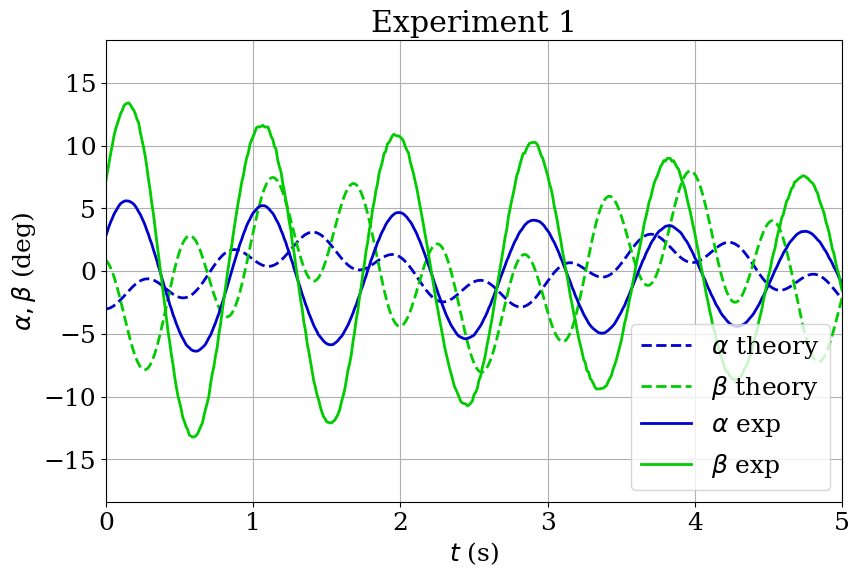

In [64]:
makeplot(make_theoretical_data(4.438994,3.665611,1.742892,-1.871067), Experiment_1)

Now do the same for Experiment_2 and Experiment_3.

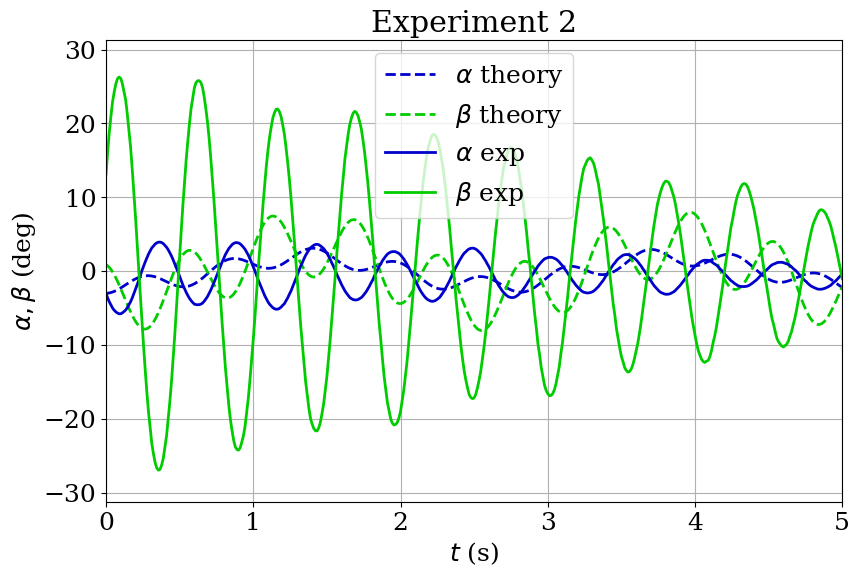

In [65]:
makeplot(make_theoretical_data(4.438994,3.665611,1.742892,-1.871067), Experiment_2)

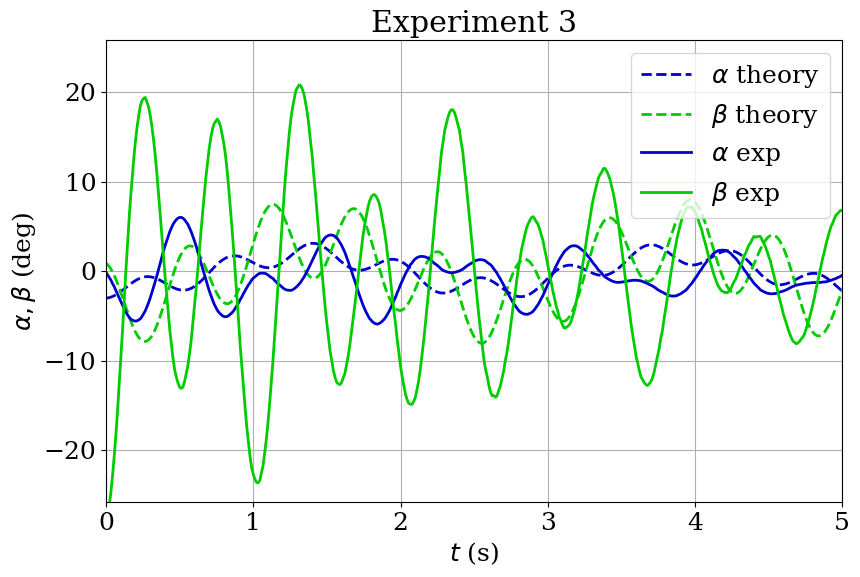

In [66]:
makeplot(make_theoretical_data(4.438994,3.665611,1.742892,-1.871067), Experiment_3)

A key shortcomming of the theoretical model is that it doesn't account for friction/damping, which is clearly present in the experimental data. Building on last years vibrations course, we should instead try a form like:
$$
\left(\begin{array}{c}
\alpha \\
\beta\end{array}\right)=A_1 \mathrm{e}^{-\gamma_1 t} \left(\begin{array}{c}
ModeShapeRatio_1 \\
1\end{array}\right)\sin{\left(\omega_1 t +\phi_1\right)}+A_2 \mathrm{e}^{-\gamma_2 t} \left(\begin{array}{c}
ModeShapeRatio_2 \\
1\end{array}\right)\sin{\left(\omega_2 t +\phi_2\right)}
$$
where the two modes each decay with a different damping factor $\gamma_1$ and $\gamma_2$. This cell fixes values of $gamma_1$ and $gamma_2$, and then defines a new function

make_theoretical_data_with_damping

which is exactly like make_theoretical_data except it also includes this damping. [FILL IN THE GAPS, perhaps start with gamma1=gamma2=0.5]


In [72]:
gamma1=-0.037741 #1/seconds
gamma2= 1.658316 #1/seconds

def make_theoretical_data_with_damping(A1,A2,phi1,phi2):
    t = np.linspace(0,5,500)
    alpha=A1*mode1shaperatio*np.sin(omega1*t+phi1)*np.exp(-gamma1*t)+A2*mode2shaperatio*np.sin(omega2*t+phi2)*np.exp(-gamma2*t)
    beta=A1*np.sin(omega1*t+phi1)*np.exp(-gamma1*t)+A2*np.sin(omega2*t+phi2)*np.exp(-gamma2*t)
    return [t,alpha,beta]

Now plot the damped prediction against the experimental data, and fiddle with all the parameters to get the best fit you can. See if you can find one set of parameters that fit all three experiments well.


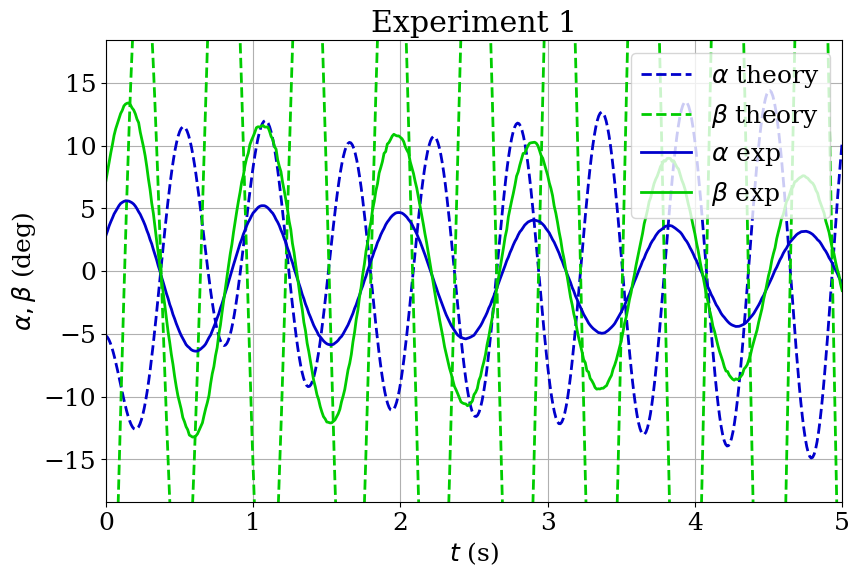

In [68]:
makeplot(make_theoretical_data_with_damping(-32.242938,29.204889,2.158370,-0.916167),Experiment_1)

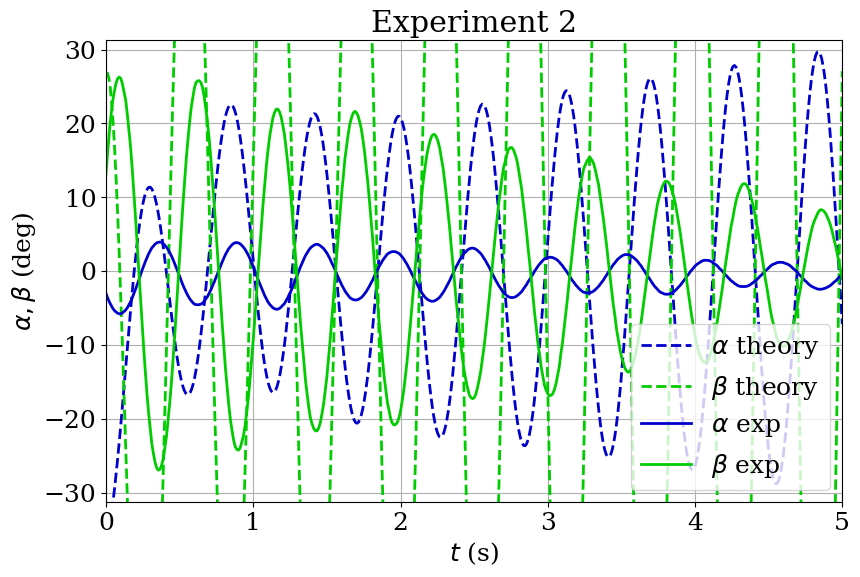

In [69]:
makeplot(make_theoretical_data_with_damping(64.144743,39.400100,1.659206,-1.228411),Experiment_2)

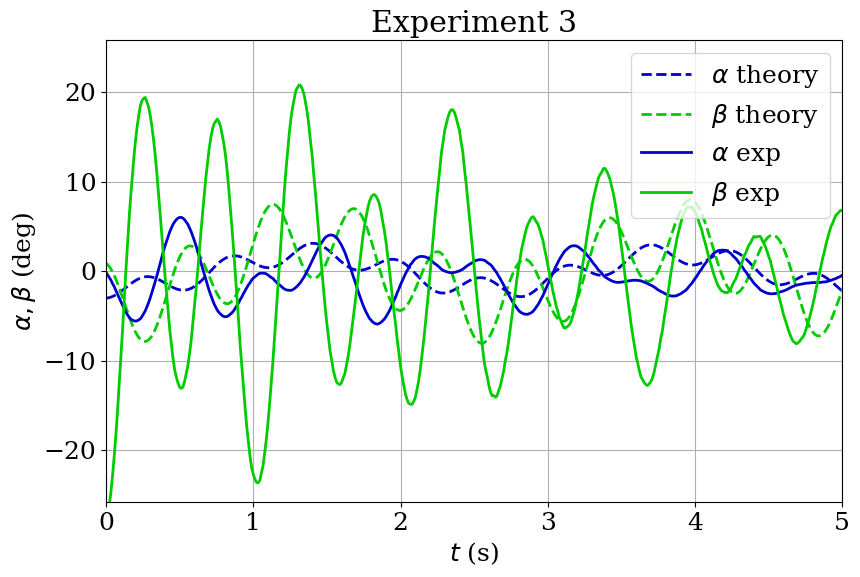

In [70]:
makeplot(make_theoretical_data(4.438994,3.665611,1.742892,-1.871067), Experiment_3)

Now try your own small vibrations data! The cell below makes the first plot for your 1-page submission for D1 lab credit. Try to find some theory parameters that give a good fit - you may wish to re-analyze your own versions of Exp_1 and Exp_2 to find your best values of omega1, omega2, mode1shaperatio, mode2shaperatio - these can drift a little between experiments.

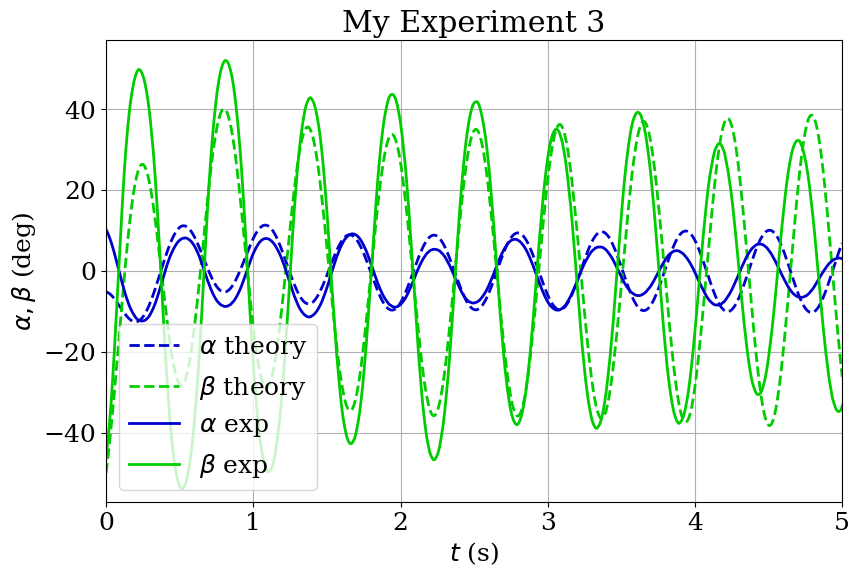

In [73]:
makeplot(make_theoretical_data_with_damping(-32.242938,29.204889,2.158370,-0.916167),My_Experiment_3)

Take the My_Experiment_3 plot in the cell above for your report. In a web browswer, you can save the image by simply right clicking on it. Don't forget to also make a note of the theoretical parameters, omega1, omega2, mode1shaperatio, mode2shaperatio, A1, A2, phi1, phi2, gamma1, gamma2